# ML regression to predict the Efficacy of an active G9a inhibitor, using Dataset 1

### Content   <a name="content"></a>

1. [Data loading](#1)
2. [Ensure equal number of target 1 and 0 in the test data](#2)
3. [Balance data](#3)
4. [Feature importance selection](#4)


### Data loading and observations <a name="1"></a>

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_IUPACs.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (45766, 4323)


target  acenaphthyleno  acetaldehyde  acetamide  acetamido  \
0       0               0             0          0          0   
1       0               0             0          0          0   
2       0               0             0          0          0   
3       0               0             0          0          0   
4       0               0             0          0          0   

   acetamidoacetyl  acetamidoadamantane  acetamidoanilino  \
0                0                    0                 0   
1                0                    0                 0   
2                0                    0                 0   
3                0                    0                 0   
4                0                    0                 0   

   acetamidobenzenesulfonate  acetamidobenzoate  acetamidobenzoyl  \
0                          0                  0                 0   
1                          0                  0                 0   
2                          0                  0                 0   
3                          0                  0                 0   
4                          0                  0                 0   

   acetamidoethyl  acetamidoethylamino  acetamidomethyl  acetamidophenoxy  \
0               0                    0                0                 0   
1               0                    0                0                 0   
2               0                    0                0                 0   
3               0                    0                0                 0   
4               0                    0                0                 0   

   acetamidophenyl  acetamidopiperidin  acetamidopropanoate  \
0                0                   0                    0   
1                0                   0                    0   
2                0                   0                    0   
3                0                   0                    0   
4                0                   0                    0   

   acetamidopropanoyl  acetamidopyrazol  acetamidopyridin  acetamidothiophen  \
0                   0                 0                 0                  0   
1                   0                 0                 0                  0   
2                   0                 0                 0                  0   
3                   0                 0                 0                  0   
4                   0                 0                 0                  0   

   acetate  aceticacid  acetohydrazide  acetonitrile  acetyl  acetylanilino  \
0        0           0               0             0       0              0   
1        0           0               0             0       0              0   
2        0           0               0             0       0              0   
3        0           0               0             0       0              0   
4        0           0               0             0       0              0   

   acetylbenzimidazol  acetylbenzoate  acetylbenzoyl  \
0                   0               0              0   
1                   0               0              0   
2                   0               0              0   
3                   0               0              0   
4                   0               0              0   

   acetylcarbamothioylamino  acetylimino  acetylindol  acetylnaphthalen  \
0                         0            0            0                 0   
1                         0            0            0                 0   
2                         0            0            0                 0   
3                         0            0            0                 0   
4                         0            0            0                 0   

   acetyloxy  acetyloxybenzoate  acetyloxybenzoyl  acetyloxyethyl  \
0          0                  0                 0               0   
1          0                  0                 0               0   
2          0                  0      

[<a href="#content">Back to top</a>]

## Ensure equal number of target 1 and 0 in the testing set <a name="2"></a>

In [3]:
df['target'].value_counts()

target
0    39130
1     6636
Name: count, dtype: int64

In [4]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract every nth row (e.g., every 2nd row)
n = 4
df_0 = df_0[df_0.index % n == 0] 

df_0.shape

(9783, 4323)

In [5]:
# Create a df_0 csv file
df_0.to_csv('df_0.csv')

In [6]:
## Extract 1650 samples (10% of 16,419 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:1650]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[1650:]

In [7]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Create a csv file
df_1.to_csv('df_1.csv')

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:1650]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[1650:]

In [8]:
# Create train and test dataframes for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [9]:
# Shuffle the resulting data sets
train = train.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Shuffle the resulting data set
test = test.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

In [10]:
# Create the sets for ML 
X_train = train.drop(columns='target', axis=1)
y_train = train['target']
X_test =  test.drop(columns='target', axis=1)
y_test = test['target']

In [11]:
# Create the sets for Cross-validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])

In [12]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
1    1650
0    1650
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Balance data  <a name="3"></a>

[(0, 8133), (1, 4986)]


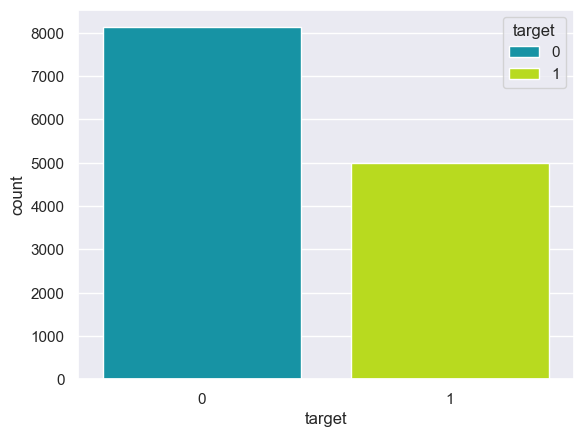

In [13]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 8133), (1, 8133)]


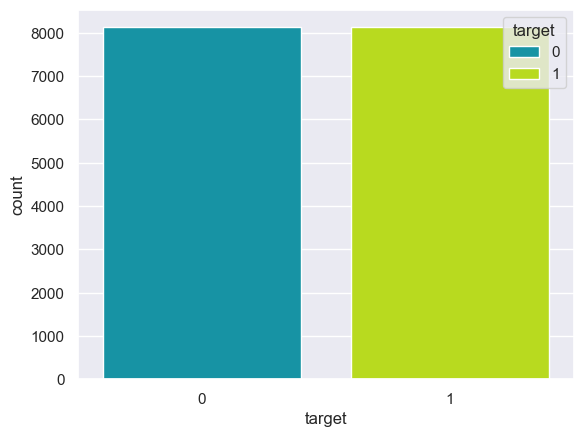

In [14]:
from imblearn.over_sampling import SMOTE

# X_train is the feature data and y_train is a target data
smote = SMOTE(sampling_strategy='auto')  # or specify a desired ratio
X_train, y_train = smote.fit_resample(X_train, y_train)

# Illustrate the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

[<a href="#content">Back to top</a>]

## Feature importance selection  <a name="4"></a>

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt

# Instantiate the estimator 
model = RandomForestClassifier()

# Train  
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.524
Precision:  0.521
Recall:  0.6
F1:  0.558
ROC:  0.524


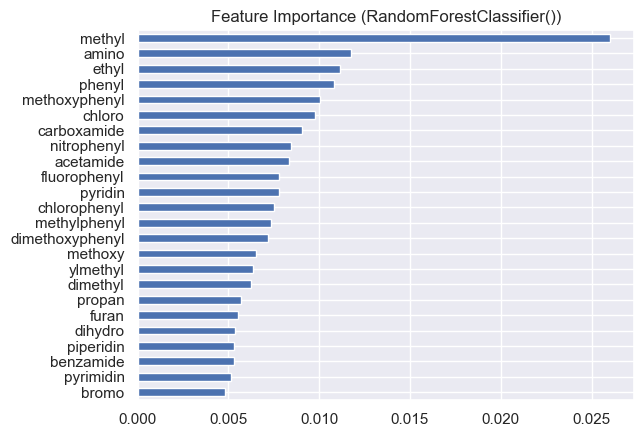

In [16]:
# Define feature importance of RandomForestClassifier 
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.nlargest(24).sort_values()

# Plot feature importance of RandomForestClassifier 
feat_imp.plot(kind="barh", title="Feature Importance ({:})".format(model))
plt.show()

In [17]:
print(feat_imp)

bromo              0.004818
pyrimidin          0.005154
benzamide          0.005282
piperidin          0.005317
dihydro            0.005345
furan              0.005541
propan             0.005672
dimethyl           0.006236
ylmethyl           0.006352
methoxy            0.006510
dimethoxyphenyl    0.007177
methylphenyl       0.007365
chlorophenyl       0.007523
pyridin            0.007760
fluorophenyl       0.007783
acetamide          0.008355
nitrophenyl        0.008436
carboxamide        0.009055
chloro             0.009741
methoxyphenyl      0.010046
phenyl             0.010797
ethyl              0.011122
amino              0.011744
methyl             0.026022
dtype: float64


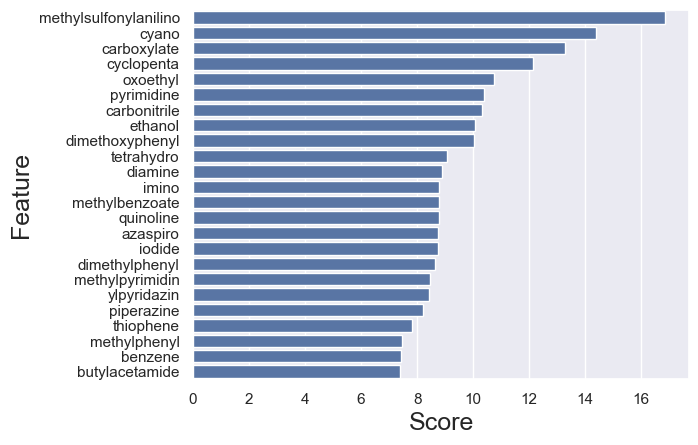

In [18]:
from sklearn.feature_selection import SelectKBest, chi2 
import seaborn as sns

# Feature selection 
sf = SelectKBest(chi2, k='all')

# Run score function on (X, y) and get the appropriate features.
sf_fit = sf.fit(X, y)

# Plot the scores
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
datset = datset.head(24) # Top 20 features 
sns.barplot(x=datset['scores'], y=datset['feature'])
sns.set_style('whitegrid')
plt.ylabel('Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [19]:
print(datset)

                    feature     scores
2442  methylsulfonylanilino  16.858586
609                   cyano  14.396171
528             carboxylate  13.262633
746              cyclopenta  12.116563
2694               oxoethyl  10.752872
3424             pyrimidine  10.374665
501            carbonitrile  10.302775
1603                ethanol  10.060372
1140        dimethoxyphenyl  10.038299
3660             tetrahydro   9.070702
853                 diamine   8.900702
2037                  imino   8.789493
2214         methylbenzoate   8.781015
3435              quinoline   8.761753
130                azaspiro   8.745767
2065                 iodide   8.731966
1227         dimethylphenyl   8.636396
2377        methylpyrimidin   8.444148
4201            ylpyridazin   8.419061
3259             piperazine   8.224132
3793              thiophene   7.810934
2329           methylphenyl   7.473385
168                 benzene   7.440019
422          butylacetamide   7.371157


In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
# model = RandomForestClassifier(max_depth=15)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.573 0.584 0.586 0.578 0.571]
Mean cross-validation score: 0.578


[<a href="#content">Back to top</a>]